In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
sklearn.__version__

'1.0.1'

### 1. Data 

In [29]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


### 2. Wizualizacja danych

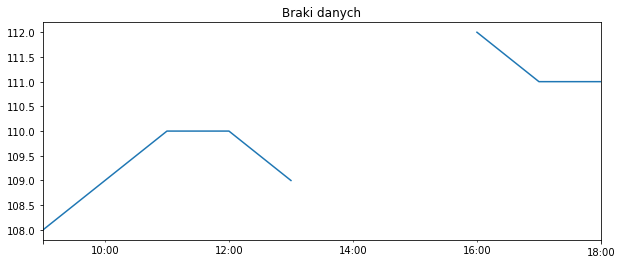

In [4]:
# moja wizualizacja prosta
df.plot(figsize=(10,4), title='Braki danych', legend=False);

#### - biblioteka matplotlib + seaborn + register_matplotlib_converters (zmienia wyświetlanie szeregó czasowych)

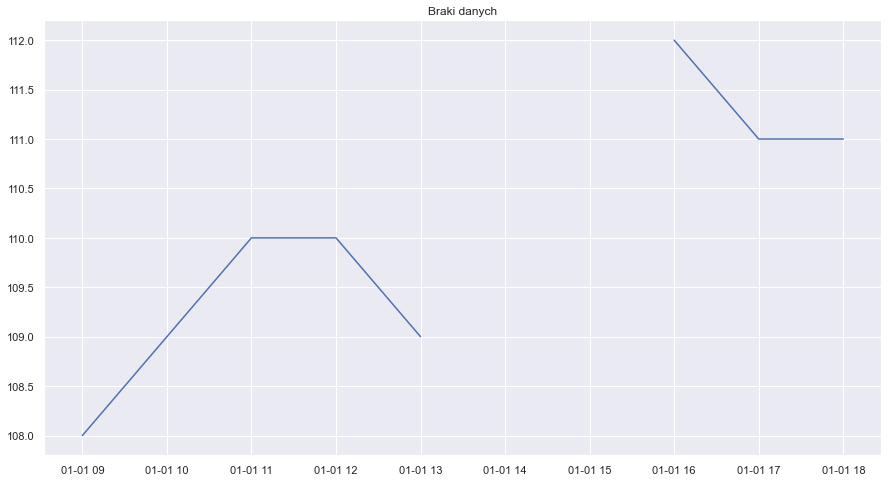

In [8]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set()

plt.figure (figsize=(15,8))
plt.title('Braki danych')
_ = plt.plot(df.price)

#### - biblioteka plotly

In [16]:
import plotly.express as px

df_plotly = df.reset_index()
df_plotly

,index,price
0,2020-01-01 09:00:00,108.0
1,2020-01-01 10:00:00,109.0
2,2020-01-01 11:00:00,110.0
3,2020-01-01 12:00:00,110.0
4,2020-01-01 13:00:00,109.0
5,2020-01-01 14:00:00,NaN
6,2020-01-01 15:00:00,NaN
7,2020-01-01 16:00:00,112.0
8,2020-01-01 17:00:00,111.0
9,2020-01-01 18:00:00,111.0


In [14]:
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych')

### 3. Braki danych:

#### - usuwanie braków

In [18]:
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - brak danych')

#### - wypełnianie braków stałą wartością - 0

In [23]:
df_plotly = df.reset_index()
df_plotly['price'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - brak danych')

#### - średnia z danych

In [32]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - brak danych')

#### - interpolacja - interpolate()

In [34]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - brak danych')

#### - forward fill - ffill - wstawianie wartości, które był zaoobserwowane wcześniej

In [36]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - brak danych -ffill')

#### - metoda backward fill - wstawia ostatnią zaobserwowaną wartość


In [37]:
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - brak danych -ffill')